# Bifurcation Analysis with Julia

This notebook serves as a digital journal of experimentation with Julia packages suitable for bifurcation analysis

References:
* Nonlinear Dynamics and Chaos (2nd edition) *by Steven Strogatz* [1]
* [Julia Discourse](https://discourse.julialang.org/search?q=bifurcation) [2]

Potential Packages:
* [PseudoArcLengthContinuation.jl](https://rveltz.github.io/PseudoArcLengthContinuation.jl/dev/) [3]
* [PyDSTool.jl](https://github.com/SciML/PyDSTool.jl) [4]
* [Bifurcation.jl](https://tkf.github.io/Bifurcations.jl/dev/) [5]
* [DynamicalSystem.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/chaos/orbitdiagram/) [6]

**WARNING:** Do not run the cell below (personal setup)

In [1]:
] activate C:\Users\trann\bifurcation\Project.toml

 Activating environment at `C:\Users\trann\bifurcation\Project.toml`


## Bifurcation.jl

### Import essential packages

In [2]:
using Plots
using Parameters: @unpack
using DiffEqBase: ODEProblem, init, solve!
using Bifurcations: BifurcationProblem
using Setfield: @lens
using StaticArrays: SVector

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Info: Precompiling DiffEqBase [2b5f629d-d688-5b77-993f-72d75c75574e]
└ @ Base loading.jl:1260
┌ Info: Precompiling Bifurcations [0487d830-9c4b-11e8-0cca-ad1c5175e159]
└ @ Base loading.jl:1260


### Calcium channel model [5]

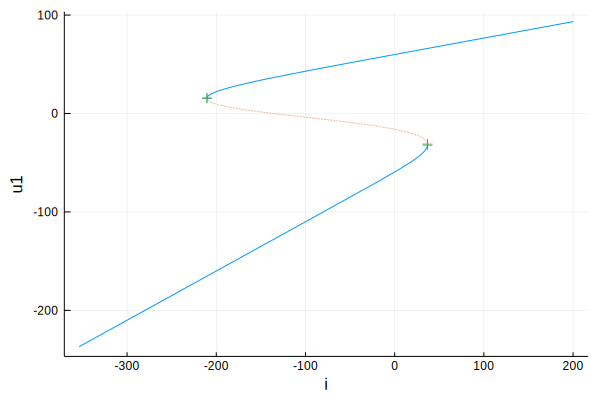

In [3]:
# specify parameters
calcium_param = (
    vl = -60,
    vca = 120,
    i = -220.0,
    gl = 2,
    gca = 4,
    c = 20,
    v1 = -1.2,
    v2 = 18,
)

# define models
function f(u, p, t)
    @unpack vl, vca, i, gl, gca, c, v2, v1 = p
    v = u[1]
    w = u[2]
    dv = (i + gl * (vl - v) - gca * 0.5 * (1 + tanh((v-v1)/v2)) * (v-vca)) / c
    dw = v-w
    return SVector(dv, dw)
end

# create ODE problem
u0 = SVector(-170.0, -170.0)
tspan = (0.0, 30.0)  # ignored by Bifurcations.jl
ode = ODEProblem(f, u0, tspan, calcium_param)

# create bifurcation problem
param_axis = @lens _.i
prob = BifurcationProblem(ode, param_axis, (-300.0, 100.0))

solver = init(prob)
solve!(solver)
sol = solver.sol

plt = plot(sol)

### Example 4.3.1 [1]

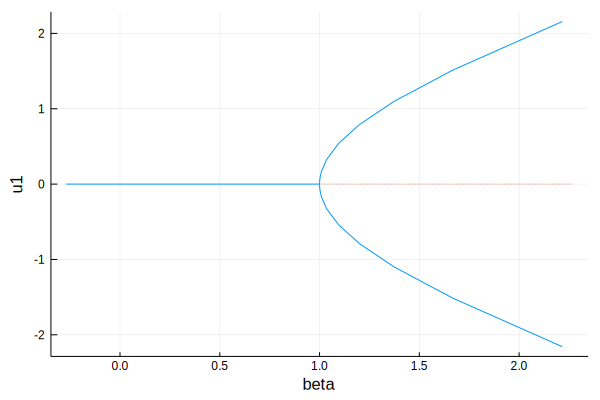

In [4]:
# specify parameters
param = (
    beta = 1.0,
)

# define model
function f(u, p, t)
    @unpack beta = p
    x = u[1]
    dx = -x + beta*tanh(x)
    return dx
end

# create ODE problem
u0 = 0.0
tspan = (0.0, 10.0)
ode = ODEProblem(f, u0, tspan, param)

# create bifurcation problem
param_axis = @lens _.beta
prob = BifurcationProblem(ode, param_axis, (0.0, 2.0))

#solve and plot
solver = init(prob)
solve!(solver)
sol = solver.sol

plt = plot(sol)

### Example 4.3.2 [1]

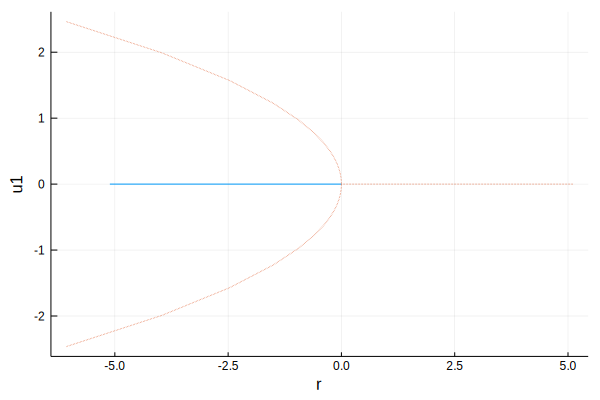

In [5]:
# specify parameters
param = (
    r = 0.0,
)

# define model
function f(u, p, t)
    @unpack r = p
    x = u[1]
    dx = r*x + x^3
    return dx
end

# create ODE problem
u0 = 0.0
tspan = (0.0, 10.0)
ode = ODEProblem(f, u0, tspan, param)

# create bifurcation problem
param_axis = @lens _.r
prob = BifurcationProblem(ode, param_axis, (-5.0, 5.0))

#solve and plot
solver = init(prob)
solve!(solver)
sol = solver.sol

plt = plot(sol)

## PyDSTool.jl

### Import essential packages

In [6]:
using PyDSTool
using ParameterizedFunctions

┌ Info: Precompiling PyDSTool [7186c646-c682-5568-b8f7-a702076b479d]
└ @ Base loading.jl:1260
┌ Info: Installing PyDSTool via the Conda pydstool package...
└ @ PyCall C:\Users\trann\.juliapro\JuliaPro_v1.4.0-1\packages\PyCall\zqDXB\src\PyCall.jl:697
┌ Info: Running `conda config --add channels conda-forge --file 'C:\Users\trann\.juliapro\JuliaPro_v1.4.0-1\Conda_env\condarc-julia.yml' --force` in root environment
└ @ Conda C:\Users\trann\.juliapro\JuliaPro_v1.4.0-1\packages\Conda\3rPhK\src\Conda.jl:113
┌ Info: Running `conda install -y pydstool` in root environment
└ @ Conda C:\Users\trann\.juliapro\JuliaPro_v1.4.0-1\packages\Conda\3rPhK\src\Conda.jl:113


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 

Examining conflict for python pydstool:   0%|          | 0/3 [00:00<?, ?it/s]    


Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed



UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - pydstool -> python[version='2.7.*|3.5.*|3.6.*']

Your python: python=3.7

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.

The following specifications were found to be incompatible with your CUDA driver:

  - feature:/win-64::__cuda==11.0=0
  - feature:|@/win-64::__cuda==11.0=0

Your installed CUDA driver is: 11.0




InitError: InitError: failed process: Process(setenv(`'C:\Users\trann\.juliapro\JuliaPro_v1.4.0-1\Conda_env\Scripts\conda.exe' install -y pydstool`,["PATH=C:\\Users\\trann\\.juliapro\\JuliaPro_v1.4.0-1\\Conda_env\\Library\\bin;C:\\Users\\trann\\.juliapro\\JuliaPro_v1.4.0-1\\Conda_env\\Library\\bin;C:\\Users\\trann\\Anaconda3;C:\\Users\\trann\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\trann\\Anaconda3\\Library\\usr\\bin;C:\\Users\\trann\\Anaconda3\\Library\\bin;C:\\Users\\trann\\Anaconda3\\Scripts;C:\\Users\\trann\\Anaconda3\\bin;C:\\Users\\trann\\Anaconda3\\condabin;C:\\Users\\trann\\Anaconda3;C:\\Users\\trann\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\trann\\Anaconda3\\Library\\usr\\bin;C:\\Users\\trann\\Anaconda3\\Library\\bin;C:\\Users\\trann\\Anaconda3\\Scripts;C:\\Program Files\\Intel\\iCLS Client;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\Program Files (x86)\\GtkSharp\\2.12\\bin;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\MATLAB\\R2020a\\bin;C:\\Users\\trann\\AppData\\Local\\Microsoft\\WindowsApps;.;C:\\Users\\trann\\AppData\\Local\\Programs\\Microsoft VS Code\\bin", "USERDOMAIN_ROAMINGPROFILE=DESKTOP-H57E2GC", "HOMEPATH=\\Users\\trann", "KERNEL_LAUNCH_TIMEOUT=40", "PATHEXT=.COM;.EXE;.BAT;.CMD;.VBS;.VBE;.JS;.JSE;.WSF;.WSH;.MSC", "SESSIONNAME=Console", "GKS_USE_CAIRO_PNG=true", "APPDATA=C:\\Users\\trann\\AppData\\Roaming", "PSMODULEPATH=C:\\Program Files\\WindowsPowerShell\\Modules;C:\\Windows\\system32\\WindowsPowerShell\\v1.0\\Modules", "SYSTEMROOT=C:\\Windows", "COMMONPROGRAMW6432=C:\\Program Files\\Common Files", "PROGRAMDATA=C:\\ProgramData", "PUBLIC=C:\\Users\\Public", "USERDOMAIN=DESKTOP-H57E2GC", "OS=Windows_NT", "PROCESSOR_REVISION=9e09", "TMP=C:\\Users\\trann\\AppData\\Local\\Temp", "COMSPEC=C:\\Windows\\system32\\cmd.exe", "ALLUSERSPROFILE=C:\\ProgramData", "COMPUTERNAME=DESKTOP-H57E2GC", "JULIA_DEPOT_PATH=C:\\Users\\trann\\.juliapro\\JuliaPro_v1.4.0-1;C:\\Users\\trann\\AppData\\Local\\JuliaPro-1.4.0-1\\Julia-1.4.0\\local\\share\\julia;C:\\Users\\trann\\AppData\\Local\\JuliaPro-1.4.0-1\\Julia-1.4.0\\share\\julia", "USERNAME=trann", "COLUMNS=80", "IPY_INTERRUPT_EVENT=1232", "CONDARC=C:\\Users\\trann\\.juliapro\\JuliaPro_v1.4.0-1\\Conda_env\\condarc-julia.yml", "ONEDRIVECONSUMER=C:\\Users\\trann\\OneDrive", "USERPROFILE=C:\\Users\\trann", "PROCESSOR_LEVEL=6", "LINES=30", "MPLBACKEND=Agg", "PROGRAMW6432=C:\\Program Files", "TEMP=C:\\Users\\trann\\AppData\\Local\\Temp", "HOMEDRIVE=C:", "PYTHONIOENCODING=UTF-8", "WINDIR=C:\\Windows", "JPY_INTERRUPT_EVENT=1232", "LOCALAPPDATA=C:\\Users\\trann\\AppData\\Local", "GTK_BASEPATH=C:\\Program Files (x86)\\GtkSharp\\2.12\\", "GKSWSTYPE=svg", "PROCESSOR_IDENTIFIER=Intel64 Family 6 Model 158 Stepping 9, GenuineIntel", "NUMBER_OF_PROCESSORS=4", "PROMPT=(base) \$P\$G", "JULIA_PKG_SERVER=pkg.juliacomputing.com", "COMMONPROGRAMFILES(X86)=C:\\Program Files (x86)\\Common Files", "GKS_FILEPATH=C:\\Users\\trann\\AppData\\Local\\Temp\\jl_NRP6D1v7Lw.svg", "COMMONPROGRAMFILES=C:\\Program Files\\Common Files", "ONEDRIVE=C:\\Users\\trann\\OneDrive", "GRDIR=C:\\Users\\trann\\.juliapro\\JuliaPro_v1.4.0-1\\packages\\GR\\KbH88\\src\\..\\deps\\gr", "PROGRAMFILES(X86)=C:\\Program Files (x86)", "JUNORC_PATH=C:\\Users\\trann\\AppData\\Local\\JuliaPro-1.4.0-1\\.atom", "PROGRAMFILES=C:\\Program Files", "JPY_PARENT_PID=3156", "GKS_FONTPATH=C:\\Users\\trann\\.juliapro\\JuliaPro_v1.4.0-1\\packages\\GR\\KbH88\\src\\..\\deps\\gr", "LOGONSERVER=\\\\DESKTOP-H57E2GC", "DRIVERDATA=C:\\Windows\\System32\\Drivers\\DriverData", "CONDA_PREFIX=C:\\Users\\trann\\.juliapro\\JuliaPro_v1.4.0-1\\Conda_env", "FPS_BROWSER_USER_PROFILE_STRING=Default", "SYSTEMDRIVE=C:", "FPS_BROWSER_APP_PROFILE_STRING=Internet Explorer", "PROCESSOR_ARCHITECTURE=AMD64", "OPENBLAS_MAIN_FREE=1"]), ProcessExited(1)) [1]

during initialization of module PyDSTool

Errors when importing PyDSTool.jl

## PseudoArcLengthContinuation.jl

## DynamicalSystem.jl